In [91]:
import numpy as np
import matplotlib.pyplot as plt
import surprise as sup
import copy
import pandas as pd

# Movie lens 100k

In [2]:
lens=sup.Dataset.load_builtin('ml-100k')

### Mean squere difference

In [3]:
model=sup.KNNBasic(verbose=False)
w=sup.model_selection.cross_validate(model, lens, measures=['RMSE', 'MAE'], cv=8,verbose=True)

Evaluating RMSE, MAE of algorithm KNNBasic on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    0.9783  0.9839  0.9695  0.9832  0.9662  0.9745  0.9697  0.9670  0.9741  0.0066  
MAE (testset)     0.7732  0.7753  0.7663  0.7751  0.7621  0.7703  0.7638  0.7651  0.7689  0.0049  
Fit time          0.43    0.43    0.43    0.44    0.44    0.42    0.47    0.42    0.43    0.01    
Test time         2.12    2.12    2.19    2.18    2.17    2.16    2.30    2.12    2.17    0.05    


In [22]:
model=sup.KNNWithMeans(verbose=False)
w=sup.model_selection.cross_validate(model, lens, measures=['RMSE', 'MAE'], cv=8, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    0.9445  0.9530  0.9411  0.9599  0.9322  0.9468  0.9517  0.9475  0.9471  0.0078  
MAE (testset)     0.7439  0.7513  0.7409  0.7589  0.7355  0.7483  0.7479  0.7447  0.7464  0.0066  
Fit time          0.49    0.50    0.48    0.48    0.50    0.52    0.48    0.51    0.49    0.01    
Test time         2.17    2.18    2.17    2.07    2.24    2.11    2.14    2.15    2.15    0.05    


In [23]:
model=sup.KNNWithZScore(verbose=False)
w=sup.model_selection.cross_validate(model, lens, measures=['RMSE', 'MAE'], cv=8, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithZScore on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    0.9404  0.9448  0.9585  0.9479  0.9472  0.9493  0.9509  0.9421  0.9476  0.0053  
MAE (testset)     0.7389  0.7400  0.7531  0.7428  0.7438  0.7437  0.7479  0.7358  0.7432  0.0051  
Fit time          0.57    0.59    0.57    0.56    0.56    0.56    0.56    0.56    0.57    0.01    
Test time         2.19    2.19    2.18    2.40    2.12    2.14    2.12    2.22    2.20    0.08    


##### Jak w ogóle działa testowanie krzyżowe dla faktoryzacji macierzy?

Jeśli usuniemy całego użytkownika lub cały wiersz to mamy standardowy problem zimnego startu.

In [6]:
model=sup.SVD()
w=sup.model_selection.cross_validate(model, lens, measures=['RMSE', 'MAE'], cv=8, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    0.9335  0.9357  0.9276  0.9167  0.9253  0.9279  0.9398  0.9387  0.9307  0.0073  
MAE (testset)     0.7351  0.7373  0.7307  0.7265  0.7298  0.7285  0.7395  0.7399  0.7334  0.0049  
Fit time          6.14    6.40    6.64    6.36    6.35    6.32    6.43    6.37    6.38    0.13    
Test time         0.12    0.12    0.16    0.11    0.11    0.16    0.11    0.12    0.13    0.02    


In [7]:
model=sup.SVDpp()
w=sup.model_selection.cross_validate(model, lens, measures=['RMSE', 'MAE'], cv=8, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    0.9177  0.9211  0.9173  0.8966  0.9265  0.9136  0.9160  0.9167  0.9157  0.0081  
MAE (testset)     0.7193  0.7214  0.7208  0.7046  0.7270  0.7160  0.7158  0.7181  0.7179  0.0060  
Fit time          248.68  252.30  250.25  252.83  245.53  247.61  246.69  246.21  248.76  2.60    
Test time         2.52    2.43    2.69    2.58    2.69    2.57    2.50    2.52    2.56    0.09    


### Cosine

In [29]:
cosine_sim_mesure={'name':'cosine'}

In [30]:
model=sup.KNNBasic(verbose=False,sim_options=cosine_sim_mesure)
w=sup.model_selection.cross_validate(model, lens, measures=['RMSE', 'MAE'], cv=8,verbose=True)

Evaluating RMSE, MAE of algorithm KNNBasic on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    1.0233  1.0177  1.0047  1.0108  1.0295  1.0173  1.0066  1.0114  1.0152  0.0079  
MAE (testset)     0.8101  0.8037  0.7954  0.7972  0.8107  0.8051  0.7969  0.7986  0.8022  0.0057  
Fit time          1.11    1.12    1.07    1.14    1.12    1.07    1.08    1.06    1.10    0.03    
Test time         2.09    2.21    2.29    2.22    2.10    2.07    2.00    2.03    2.13    0.10    


In [31]:
model=sup.KNNWithMeans(verbose=False,sim_options=cosine_sim_mesure)
w=sup.model_selection.cross_validate(model, lens, measures=['RMSE', 'MAE'], cv=8, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    0.9543  0.9521  0.9499  0.9611  0.9530  0.9520  0.9497  0.9480  0.9525  0.0038  
MAE (testset)     0.7558  0.7529  0.7473  0.7586  0.7503  0.7513  0.7509  0.7514  0.7523  0.0033  
Fit time          1.11    1.11    1.10    1.11    1.11    1.11    1.20    1.12    1.12    0.03    
Test time         2.01    2.24    2.02    2.03    2.01    2.29    2.28    2.23    2.14    0.12    


In [32]:
model=sup.KNNWithZScore(verbose=False,sim_options=cosine_sim_mesure)
w=sup.model_selection.cross_validate(model, lens, measures=['RMSE', 'MAE'], cv=8, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithZScore on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    0.9478  0.9582  0.9604  0.9496  0.9555  0.9537  0.9432  0.9456  0.9518  0.0058  
MAE (testset)     0.7475  0.7537  0.7565  0.7428  0.7535  0.7478  0.7433  0.7450  0.7487  0.0049  
Fit time          1.25    1.34    1.29    1.23    1.25    1.24    1.21    1.28    1.26    0.04    
Test time         2.30    2.29    2.14    2.21    2.39    2.15    2.33    2.13    2.24    0.09    


# Movie lens 1M

In [10]:
lens=sup.Dataset.load_builtin('ml-1m')

### Mean squere difference

In [35]:
model=sup.KNNBasic(verbose=False)
w=sup.model_selection.cross_validate(model, lens, measures=['RMSE', 'MAE'], cv=8,verbose=True)

Evaluating RMSE, MAE of algorithm KNNBasic on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    0.9178  0.9219  0.9221  0.9179  0.9204  0.9169  0.9169  0.9166  0.9188  0.0021  
MAE (testset)     0.7230  0.7256  0.7260  0.7235  0.7259  0.7224  0.7229  0.7223  0.7239  0.0015  
Fit time          34.06   35.25   34.35   35.73   34.17   34.09   34.62   34.62   34.61   0.56    
Test time         70.49   71.17   73.52   70.48   70.16   70.58   69.80   70.36   70.82   1.08    


In [4]:
model=sup.KNNWithMeans(verbose=False)
w=sup.model_selection.cross_validate(model, lens, measures=['RMSE', 'MAE'], cv=8, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    0.9277  0.9275  0.9270  0.9229  0.9283  0.9304  0.9268  0.9278  0.9273  0.0019  
MAE (testset)     0.7375  0.7371  0.7368  0.7339  0.7377  0.7398  0.7368  0.7376  0.7372  0.0015  
Fit time          32.47   33.50   33.99   34.32   33.96   34.18   34.47   34.51   33.93   0.63    
Test time         69.70   69.92   69.90   70.16   70.37   70.51   70.76   70.52   70.23   0.35    


In [5]:
model=sup.KNNWithZScore(verbose=False)
w=sup.model_selection.cross_validate(model, lens, measures=['RMSE', 'MAE'], cv=8, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithZScore on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    0.9308  0.9282  0.9283  0.9293  0.9253  0.9301  0.9297  0.9280  0.9287  0.0016  
MAE (testset)     0.7359  0.7342  0.7357  0.7356  0.7325  0.7366  0.7355  0.7350  0.7351  0.0012  
Fit time          33.56   34.81   34.44   34.63   34.61   34.75   35.13   34.83   34.59   0.43    
Test time         71.21   71.96   71.83   71.92   71.92   71.63   72.12   72.31   71.86   0.31    


In [11]:
model=sup.SVD()
w=sup.model_selection.cross_validate(model, lens, measures=['RMSE', 'MAE'], cv=8, verbose=True, n_jobs=4)

Evaluating RMSE, MAE of algorithm SVD on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    0.8662  0.8698  0.8684  0.8660  0.8692  0.8666  0.8681  0.8700  0.8680  0.0015  
MAE (testset)     0.6808  0.6825  0.6810  0.6795  0.6807  0.6804  0.6810  0.6818  0.6810  0.0008  
Fit time          76.10   73.17   72.44   74.22   69.67   68.91   71.29   71.02   72.10   2.23    
Test time         1.83    1.68    1.65    1.78    1.67    1.64    1.38    1.43    1.63    0.15    


In [12]:
model=sup.SVDpp()
w=sup.model_selection.cross_validate(model, lens, measures=['RMSE', 'MAE'], cv=8, verbose=True, n_jobs=4)

Evaluating RMSE, MAE of algorithm SVDpp on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    0.8594  0.8576  0.8570  0.8560  0.8609  0.8559  0.8579  0.8592  0.8580  0.0016  
MAE (testset)     0.6703  0.6678  0.6685  0.6681  0.6701  0.6684  0.6684  0.6701  0.6690  0.0009  
Fit time          5365.21 5363.31 5433.12 5394.34 5365.42 5335.05 5382.07 5427.86 5383.30 31.56   
Test time         50.55   50.54   51.06   50.39   50.96   54.61   43.79   43.18   49.39   3.64    


### Cosine

In [6]:
cosine_sim_mesure={'name':'cosine'}

In [7]:
model=sup.KNNBasic(verbose=False,sim_options=cosine_sim_mesure)
w=sup.model_selection.cross_validate(model, lens, measures=['RMSE', 'MAE'], cv=8,verbose=True)

Evaluating RMSE, MAE of algorithm KNNBasic on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    0.9743  0.9759  0.9765  0.9757  0.9774  0.9757  0.9745  0.9750  0.9756  0.0010  
MAE (testset)     0.7694  0.7693  0.7702  0.7684  0.7715  0.7697  0.7694  0.7696  0.7697  0.0008  
Fit time          59.66   59.96   59.62   60.33   64.88   62.14   62.67   63.95   61.65   1.93    
Test time         70.01   70.56   70.49   71.25   74.98   75.14   73.72   75.97   72.76   2.28    


In [8]:
model=sup.KNNWithMeans(verbose=False,sim_options=cosine_sim_mesure)
w=sup.model_selection.cross_validate(model, lens, measures=['RMSE', 'MAE'], cv=8, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    0.9369  0.9398  0.9371  0.9395  0.9388  0.9381  0.9377  0.9360  0.9380  0.0013  
MAE (testset)     0.7460  0.7486  0.7446  0.7485  0.7477  0.7463  0.7460  0.7470  0.7468  0.0013  
Fit time          62.31   62.65   65.09   63.81   63.96   64.22   64.24   64.96   63.90   0.93    
Test time         72.41   77.01   73.59   73.63   76.18   76.10   75.45   75.30   74.96   1.48    


In [9]:
model=sup.KNNWithZScore(verbose=False,sim_options=cosine_sim_mesure)
w=sup.model_selection.cross_validate(model, lens, measures=['RMSE', 'MAE'], cv=8, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithZScore on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    0.9406  0.9419  0.9427  0.9405  0.9436  0.9412  0.9404  0.9420  0.9416  0.0011  
MAE (testset)     0.7459  0.7466  0.7472  0.7462  0.7475  0.7456  0.7458  0.7474  0.7465  0.0007  
Fit time          64.46   65.04   64.83   66.71   67.46   64.46   64.73   64.68   65.30   1.07    
Test time         75.95   76.88   76.40   81.32   81.20   76.11   74.71   75.40   77.25   2.39    


# d

In [68]:
lens=sup.Dataset.load_builtin('ml-100k')

In [69]:
T=lens.build_full_trainset()

In [141]:
liczbaOcenionych={}
for uid,_,_,_ in lens.raw_ratings:
    if uid not in liczbaOcenionych:
        liczbaOcenionych[uid]=1
    else:
        liczbaOcenionych[uid]+=1

liczbaOcen=list(liczbaOcenionych.values())

(array([416., 144., 100.,  83.,  51.,  45.,  26.,  29.,  16.,   9.,  12.,
          3.,   2.,   3.,   1.,   0.,   0.,   1.,   1.,   1.]),
 array([ 20.  ,  55.85,  91.7 , 127.55, 163.4 , 199.25, 235.1 , 270.95,
        306.8 , 342.65, 378.5 , 414.35, 450.2 , 486.05, 521.9 , 557.75,
        593.6 , 629.45, 665.3 , 701.15, 737.  ]),
 <BarContainer object of 20 artists>)

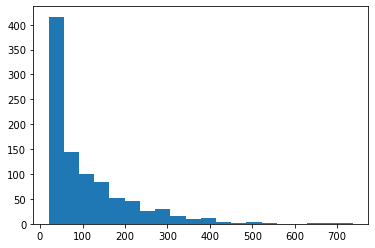

In [142]:
plt.hist(liczbaOcen, bins=20)

In [168]:
uzytkownicyAktywni=set()
uzytkownicyNieaktywni=set()
for i in liczbaOcenionych:
    if liczbaOcenionych[i]>100:
        uzytkownicyAktywni.add(i)
    elif liczbaOcenionych[i]<50:
        uzytkownicyNieaktywni.add(i)
ocenyAktywnych=[]
ocenyNieaktywnych=[]
ocenyReszta=[]
socenyAktywnych=[]
socenyNieaktywnych=[]
socenyReszta=[]
for ocena in lens.raw_ratings:
    if ocena[0] in uzytkownicyAktywni:
        ocenyAktywnych.append(tuple(ocena[:3]))
        socenyAktywnych.append(ocena)
    elif ocena[0] in uzytkownicyNieaktywni:
        ocenyNieaktywnych.append(tuple(ocena[:3]))
        socenyNieaktywnych.append(ocena)
    else:
        ocenyReszta.append(tuple(ocena[:3]))
        socenyReszta.append(ocena)

In [171]:
trainRN=lens.construct_trainset((socenyReszta+socenyNieaktywnych))
trainRA=lens.construct_trainset((socenyReszta+socenyAktywnych))

In [172]:
model=sup.KNNBasic()

In [178]:
model.fit(T)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [179]:
predictions = model.test(ocenyNieaktywnych)
sup.accuracy.rmse(predictions)

RMSE: 0.6799


0.679886811792238

In [180]:
predictions = model.test(ocenyAktywnych)
sup.accuracy.rmse(predictions)

RMSE: 0.8015


0.8014634208916951